<a href="https://colab.research.google.com/github/imen-g/Deep-Learning/blob/master/Metrics_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Importing libraries**



In [117]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

**Importing the Dataset**

In [118]:
data = pd.read_csv('metrics_database.csv',parse_dates=True) 
data.sample(5)

,_id,Broker_availability,Average_response_time,flowConsumer,flowPublisher,Average_execution_delay,goodPut,Broker_reactivity,Network_delay,Conformity_rate,Broker_failure_rate,Rate_of_messages_transmitted,existence_of_problem,type_of_problem
27,ObjectId(611e63d36766078ecb18aa83),0.0,2.3779,0.9103,0.3828,0.7732,0.0012,1.0984,781,100.0,40.7920,29.6039,yes,Low response time
23,ObjectId(611e63d36766078ecb18aa80),0.0,1.0000,1.7845,1.7845,0.4700,0.0050,0.9200,541,100.0,0.0000,100.0000,no,no problem
6,ObjectId(611e63d36766078ecb18aa12),0.0,9.4708,1.8665,0.1970,0.4845,0.0018,0.5357,959,100.0,23.8994,4.5502,yes,Consumption stopped
0,ObjectId(611e63d36766078ecb18aa70),0.0,2.0169,0.3986,0.1976,1.6769,0.0016,2.5084,597,100.0,33.7078,33.1460,yes,Missing consumer partner
2,ObjectId(611e63d36766078ecb18aa66),0.0,2.0169,0.3986,0.1976,1.6769,0.0016,2.5084,597,100.0,3.7546,2.3546,yes,Missing consumer partner


**Data processing**

In [119]:
data.isna().sum() #Checking for missing values

_id                             0
Broker_availability             0
Average_response_time           0
flowConsumer                    0
flowPublisher                   0
Average_execution_delay         0
goodPut                         0
Broker_reactivity               0
Network_delay                   0
Conformity_rate                 0
Broker_failure_rate             0
Rate_of_messages_transmitted    0
existence_of_problem            0
type_of_problem                 0
dtype: int64

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id                           50 non-null     object 
 1   Broker_availability           50 non-null     float64
 2   Average_response_time         50 non-null     float64
 3   flowConsumer                  50 non-null     float64
 4   flowPublisher                 50 non-null     float64
 5   Average_execution_delay       50 non-null     float64
 6   goodPut                       50 non-null     float64
 7   Broker_reactivity             50 non-null     float64
 8   Network_delay                 50 non-null     int64  
 9   Conformity_rate               50 non-null     float64
 10  Broker_failure_rate           50 non-null     float64
 11  Rate_of_messages_transmitted  50 non-null     float64
 12  existence_of_problem          50 non-null     object 
 13  type_of

In [121]:
data.type_of_problem.value_counts()

Expected data not available                         4
Long data transmission delay                        4
Data loss                                           4
Lack of interaction                                 4
Missing acknowledgment for an exchange process      4
Low response time                                   4
inability of conscumers to receive more messages    4
Missing producer partner                            4
Invalid exchange format                             4
Missing consumer partner                            4
Low exchange rate                                   4
no problem                                          4
Consumption stopped                                 2
Name: type_of_problem, dtype: int64

In [124]:
data.describe()

,Broker_availability,Average_response_time,flowConsumer,flowPublisher,Average_execution_delay,goodPut,Broker_reactivity,Network_delay,Conformity_rate,Broker_failure_rate,Rate_of_messages_transmitted
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,9.972512,6.100292,1.488042,0.589316,0.910486,0.015828,1.287931,1083.400000,96.060000,36.473708,30.188324
std,23.871385,6.639567,1.370576,0.438323,0.806993,0.091655,1.204064,965.176033,15.846889,33.656523,30.288952
min,0.000000,0.908000,0.197600,0.133000,0.126800,0.000700,0.135600,380.000000,14.250000,0.000000,1.654800
25%,0.000000,1.009725,0.721525,0.197600,0.439700,0.001000,0.539750,597.000000,100.000000,4.800000,5.875400
50%,0.000000,2.197400,1.106200,0.414400,0.495000,0.001400,0.920000,781.000000,100.000000,23.180700,19.386400
75%,0.000000,11.545375,1.854700,0.924125,1.470375,0.001800,1.098400,1201.000000,100.000000,72.065750,49.740000
max,90.300000,25.066600,7.369600,1.784500,2.890000,0.650300,5.058800,5421.000000,100.000000,99.454500,100.000000


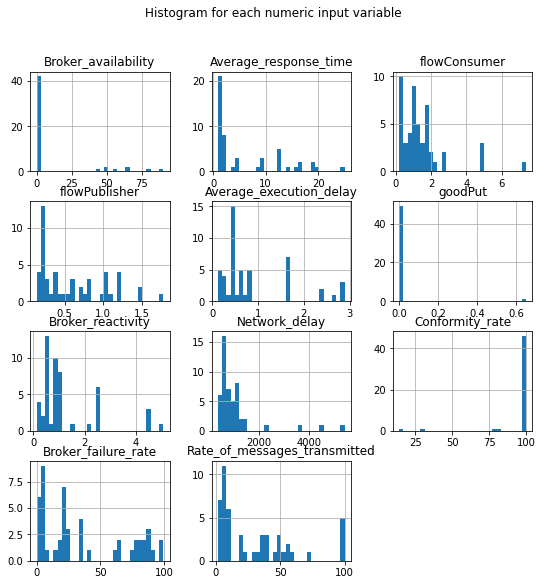

In [123]:
import pylab as pl
data.drop('type_of_problem' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('data_hist')
plt.show()

there is not a strong correlation relation between the attributes

**Separating features and target**

In [84]:
data=data.values
X = data[:,1:11].astype(float)
Y = data[:,13]

In [85]:
X

array([[0.00000e+00, 2.01690e+00, 3.98600e-01, 1.97600e-01, 1.67690e+00,
        1.60000e-03, 2.50840e+00, 5.97000e+02, 1.00000e+02, 3.37078e+01],
       [0.00000e+00, 2.01690e+00, 3.98600e-01, 1.97600e-01, 1.67690e+00,
        1.60000e-03, 2.50840e+00, 5.97000e+02, 1.00000e+02, 4.70780e+00],
       [0.00000e+00, 2.01690e+00, 3.98600e-01, 1.97600e-01, 1.67690e+00,
        1.60000e-03, 2.50840e+00, 5.97000e+02, 1.00000e+02, 3.75460e+00],
       [0.00000e+00, 2.01690e+00, 3.98600e-01, 1.97600e-01, 1.67690e+00,
        1.60000e-03, 2.50840e+00, 5.97000e+02, 1.00000e+02, 6.76570e+00],
       [0.00000e+00, 8.47480e+00, 1.44600e+00, 1.65700e-01, 6.36700e-01,
        9.00000e-04, 4.53780e+00, 1.08000e+03, 1.00000e+02, 7.88915e+01],
       [0.00000e+00, 9.47080e+00, 1.86650e+00, 1.97000e-01, 4.84500e-01,
        1.80000e-03, 5.35700e-01, 9.59000e+02, 1.00000e+02, 8.08994e+01],
       [0.00000e+00, 9.47080e+00, 1.86650e+00, 1.97000e-01, 4.84500e-01,
        1.80000e-03, 5.35700e-01, 9.59000e+02

In [87]:
Y

array(['Missing consumer partner', 'Missing consumer partner',
       'Missing consumer partner', 'Missing consumer partner',
       'Lack of interaction', 'Consumption stopped',
       'Consumption stopped',
       'inability of conscumers to receive more messages',
       'Lack of interaction', 'no problem', 'Lack of interaction',
       'inability of conscumers to receive more messages',
       'Low exchange rate', 'Long data transmission delay',
       'Expected data not available ', 'no problem',
       'Lack of interaction', 'Long data transmission delay',
       'Long data transmission delay', 'Long data transmission delay',
       'Expected data not available ', 'Expected data not available ',
       'Expected data not available ', 'no problem',
       'inability of conscumers to receive more messages',
       'inability of conscumers to receive more messages',
       'Invalid exchange format', 'Low response time',
       'Low response time', 'Low response time', 'Low response 

**Encoding dummy variables**:Scikit-learn will not accept categorical features by default we need to encode them numerically

In [88]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables 
dummy_y = np_utils.to_categorical(encoded_Y)

In [89]:
dummy_y

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 

spliting the data 80% for training and 20% for testing

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=15)

Random state ensures that the generated splits are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that I provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order
then no matter how many times I execute my code the result would be the same .i.e, same values in train and test datasets.

I set the value of random_state based on the best accuracy I had

**Model creation**: For each model I defined:
1.   accuracy during training
2.   accuracy during the test
3.   classification report for the comparison







**Decision Tree**

In [125]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.80


In [98]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, labels=np.unique(pred)))

[[1 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]
                              precision    recall  f1-score   support

                   Data loss       1.00      1.00      1.00         1
     Invalid exchange format       1.00      0.67      0.80         3
Long data transmission delay       0.00      0.00      0.00         0
           Low exchange rate       0.50      1.00      0.67         1
           Low response time       1.00      1.00      1.00         1
    Missing consumer partner       1.00      1.00      1.00         1
    Missing producer partner       1.00      1.00      1.00         1
                  no problem       1.00      1.00      1.00         1

                   micro avg       0.80      0.89      0.84         9
                   macro avg       0.81      0.83      0.81         9
                weighted avg       0.9

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest**

In [99]:
from sklearn.ensemble import RandomForestClassifier
logreg = RandomForestClassifier()
logreg.fit(X_train, y_train)
print('Accuracy of Random forest classifier on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of Random forest classifier on training set: 1.00
Accuracy of Random forest classifier on test set: 0.90


In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred,labels=np.unique(pred)))

[[1 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]
                              precision    recall  f1-score   support

                   Data loss       1.00      1.00      1.00         1
     Invalid exchange format       1.00      1.00      1.00         3
Long data transmission delay       0.00      0.00      0.00         0
           Low exchange rate       1.00      1.00      1.00         1
           Low response time       1.00      1.00      1.00         1
    Missing consumer partner       1.00      1.00      1.00         1
    Missing producer partner       1.00      1.00      1.00         1
                  no problem       1.00      1.00      1.00         1

                   micro avg       0.90      1.00      0.95         9
                   macro avg       0.88      0.88      0.88         9
                weighted avg       1.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN** :we start by looking for the best neighbors in range [1,10] in our case the best neighbor is the first since our database is clean

([<matplotlib.axis.XTick at 0x7fcb8c5f8ad0>,
 <a list of 5 Text major ticklabel objects>)

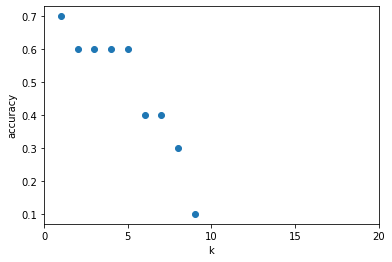

In [102]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.70


In [127]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred,labels=np.unique(pred)))

[[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]]
                              precision    recall  f1-score   support

                   Data loss       1.00      1.00      1.00         1
     Invalid exchange format       0.67      0.67      0.67         3
Long data transmission delay       0.00      0.00      0.00         0
           Low exchange rate       1.00      1.00      1.00         1
           Low response time       1.00      1.00      1.00         1
    Missing consumer partner       1.00      1.00      1.00         1
    Missing producer partner       1.00      1.00      1.00         1
                  no problem       0.00      0.00      0.00         1

                   micro avg       0.70      0.78      0.74         9
                   macro avg       0.71      0.71      0.71         9
                weighted avg       0.7

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**GaussinNB**

In [106]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train,)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.95
Accuracy of GNB classifier on test set: 0.70


In [128]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gnb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred ,labels=np.unique(pred)))

[[1 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1]]
                              precision    recall  f1-score   support

                   Data loss       0.50      1.00      0.67         1
     Invalid exchange format       1.00      0.67      0.80         3
Long data transmission delay       0.00      0.00      0.00         0
           Low exchange rate       0.50      1.00      0.67         1
           Low response time       1.00      1.00      1.00         1
    Missing consumer partner       1.00      1.00      1.00         1
                  no problem       1.00      1.00      1.00         1

                   micro avg       0.70      0.88      0.78         8
                   macro avg       0.71      0.81      0.73         8
                weighted avg       0.88      0.88      0.84         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**

In [129]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.25
Accuracy of SVM classifier on test set: 0.10


Looking for the best parameters using Grid search:
Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Grid-Search will build a model on each parameter combination possible. It iterates through every parameter combination and stores a model for each combination.

In [133]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ('linear', 'rbf','poly'),'gamma': [0.001, 0.01, 0.1, 1],'C':[0.001, 0.01, 0.1, 1, 10]}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid, cv=3)
svm_cv.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [134]:
df = pd.DataFrame.from_dict(svm_cv.cv_results_)

In [135]:
svm_cv.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [136]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',C=1,gamma = 0.001)
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.93
Accuracy of SVM classifier on test set: 0.70


In [137]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = svm.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred ,labels=np.unique(pred)))

[[1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0]]
                              precision    recall  f1-score   support

                   Data loss       1.00      1.00      1.00         1
     Invalid exchange format       0.67      0.67      0.67         3
Long data transmission delay       0.00      0.00      0.00         0
           Low exchange rate       1.00      1.00      1.00         1
           Low response time       1.00      1.00      1.00         1
    Missing consumer partner       0.50      1.00      0.67         1
    Missing producer partner       1.00      1.00      1.00         1

                   micro avg       0.70      0.88      0.78         8
                   macro avg       0.74      0.81      0.76         8
                weighted avg       0.81      0.88      0.83         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
